# Multilayer Perceptron

We train a multilayer perceptron (MLP) to recognize handwritten digits using the MNIST dataset. An MLP is the simplest type of artificial neural network.

We begin by importing the functions and modules that we will use in the notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
import pandas as pd
from sklearn.metrics import confusion_matrix

/Users/davidradcliffe/anaconda/envs/deeplearning/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


The MNIST dataset is included in scikit-learn, so we don't need to download it. The dataset has already been split into a training set and a test set. There are 60000 images in the training set, and 10000 images in the test set.

Each image is a 28 by 28 array of integers between 0 and 255. 0 represents no ink (white) and 255 represents ink (black).

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Let's see an example of a digit.

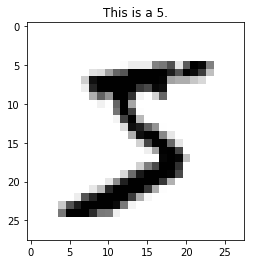

In [3]:
plt.title("This is a %d." % y_train[0])
_ = plt.imshow(X_train[0], cmap='binary')

Each digit is unrolled into a 1-dimensional array, and the values are rescaled from 0 to 1, instead of 0 to 255.

In [4]:
X_train = X_train.reshape(-1, 784) / 255
X_test = X_test.reshape(-1, 784) / 255

The labels (y-values) must be one-hot encoded. This means that each value 0-9 is encoded as a vector of length 10 in the following manner:

    0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    1 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    2 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    3 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    4 = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    5 = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    6 = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
    7 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    8 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    9 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
    

In [5]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

Now we build a neural network. It has one dense hidden layer with 128 nodes. Since we have a classification task with 10 classes, the final layer has 10 nodes and uses the softmax activation function.

In [6]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

As an aside, the softmax function converts the outputs into probabilities, by producing 10 positive numbers that add up to 1. Larger numbers result in higher probabilities. We could code the softmax function ourselves, although it is not necessary.

In [7]:
def softmax(vector):
    return np.exp(vector) / np.sum(np.exp(vector))

probabilities = softmax([-1, 2, 0, -2, 1])
print(probabilities)
print(probabilities.sum())

[0.03168492 0.63640865 0.08612854 0.01165623 0.23412166]
1.0


After training the model for 10 epochs, we obtain nearly 98% accuracy on the test set.

In [8]:
model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)

Epoch 1/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2596 - acc: 0.9265
Epoch 2/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1208 - acc: 0.9645
Epoch 3/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0891 - acc: 0.9740
Epoch 4/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0732 - acc: 0.9787 0s - loss: 0.0735 - acc: 0.97
Epoch 5/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0616 - acc: 0.9826
Epoch 6/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0522 - acc: 0.9855
Epoch 7/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0453 - acc: 0.9872
Epoch 8/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0402 - acc: 0.9886
Epoch 9/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0360 - acc: 0.9902
Epoch 10/10
10000/10000 [==============================] - 0s

[0.1068077201799566, 0.9768]

Let's take a look at the model predictions. Recall that our model is estimating a probability for each class.

In [9]:
y_pred = model.predict(X_test)
y_pred

array([[6.0256632e-16, 1.6521894e-16, 9.2894907e-11, ..., 9.9999988e-01,
        4.2331904e-13, 6.1810806e-11],
       [2.4392708e-18, 4.7543119e-14, 1.0000000e+00, ..., 8.1715981e-33,
        4.0044711e-18, 1.0254833e-33],
       [1.2380830e-12, 9.9943060e-01, 1.4092071e-05, ..., 4.1045263e-05,
        5.0922442e-04, 1.4505965e-09],
       ...,
       [6.9089408e-20, 5.0719401e-19, 8.8687224e-19, ..., 5.6925909e-08,
        1.0877205e-09, 4.2968336e-06],
       [4.3987995e-21, 5.5042518e-22, 7.6265166e-23, ..., 1.4237147e-19,
        2.5527583e-10, 2.6023491e-20],
       [1.8795938e-19, 1.6873140e-34, 7.4878102e-20, ..., 3.1443166e-28,
        6.5368898e-28, 9.6912154e-25]], dtype=float32)

But what we really want is the most probable class for each observation, not the class probabilities. We use the `argmax` method to tell us the index, in each row, where maximum probability occurs.

In [10]:
y_true = y_test.argmax(axis=1)
y_pred = y_pred.argmax(axis=1)
print(y_pred[:20])
print(y_true[:20])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Here is the confusion matrix. Which digits are most often confused with each other? Are these mistakes surprising?

In [12]:
pd.DataFrame(confusion_matrix(y_true, y_pred), index=range(10), columns=range(10))

,0,1,2,3,4,5,6,7,8,9
0,970,0,1,1,1,1,3,1,1,1
1,0,1127,3,0,0,3,2,0,0,0
2,4,2,1001,3,2,1,3,9,7,0
3,0,0,8,977,0,12,0,3,0,10
4,0,0,3,1,964,0,3,1,0,10
5,2,0,0,5,1,876,4,0,2,2
6,4,2,0,1,4,9,938,0,0,0
7,2,4,7,4,0,0,0,995,4,12
8,6,0,3,6,5,11,3,2,932,6
9,1,2,0,2,9,4,0,2,1,988
